# THE SPARKS FOUNDATION

## Task 3: Performing Exploratory Data Analysis on dataset SampleSuperstore

#### As a business manager, I try to find out the weak areas where we can work to make more profit.

## Intern: Ishaan Thareja

#### Dataset : https://bit.ly/3i4rbWl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F283937488>,
      dtype=object)

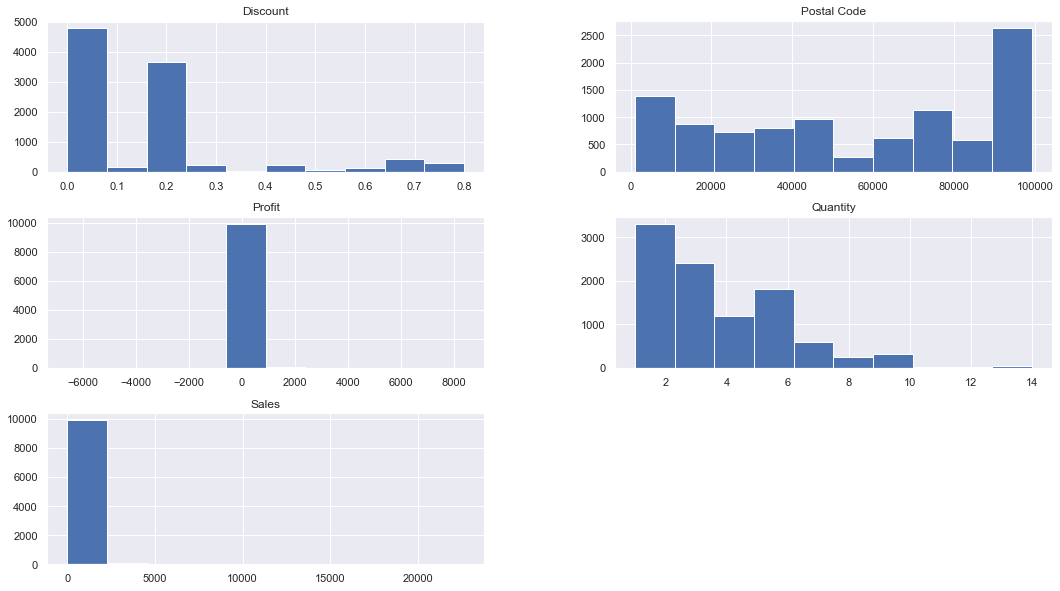

In [5]:
data.hist(bins=10, figsize=(18,10))

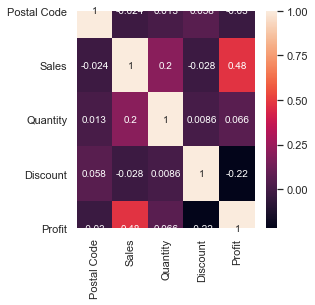

In [6]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(), annot=True)

## [1] Analysis based on Ship Mode

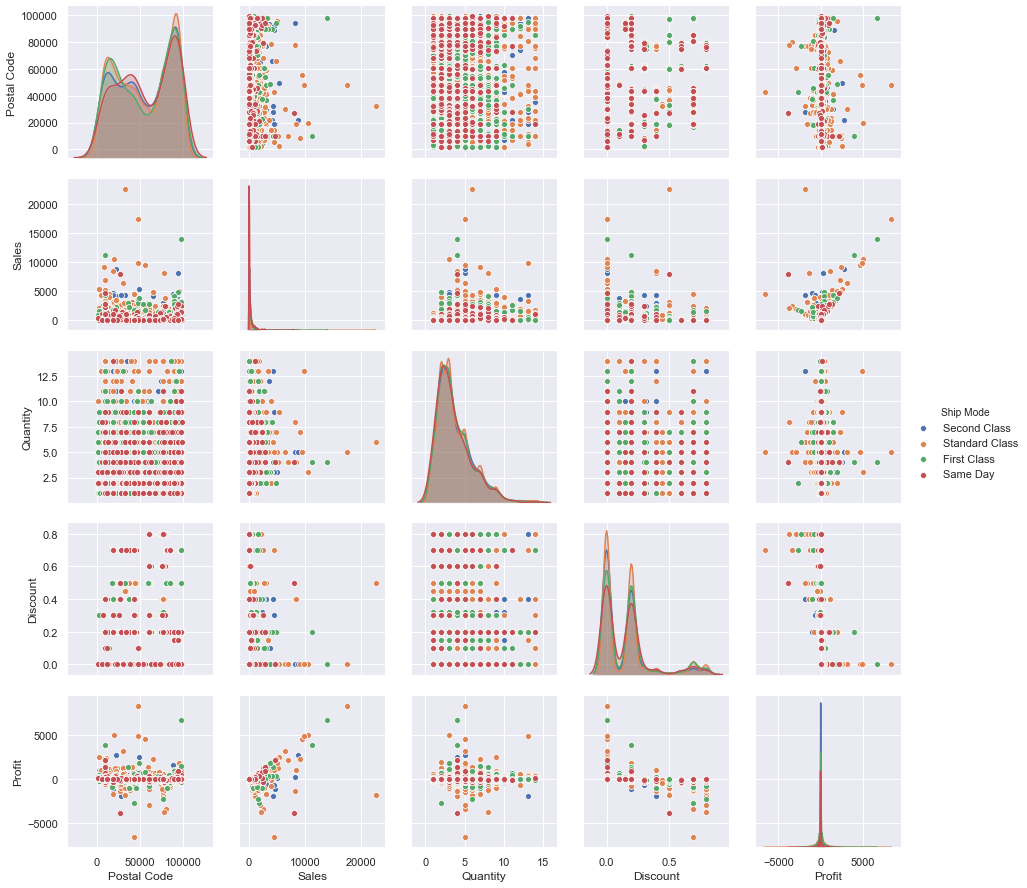

In [7]:
sns.pairplot(data, hue='Ship Mode')

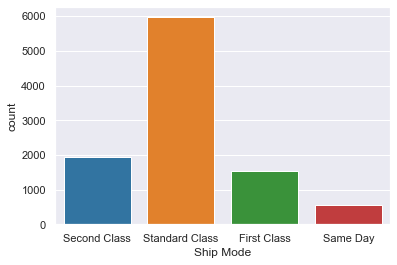

In [8]:
sns.countplot(x='Ship Mode', data=data, palette='tab10')

In [9]:
data_shipmode = data.groupby(['Ship Mode'])[['Sales', 'Profit', 'Discount']].mean()
data_shipmode

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.089239,29.535545,0.138895
Standard Class,227.583067,27.494770,0.160023


In [10]:
colors_4 = ['magenta','yellow','orange','red']
colors_3 = ['green', 'blue','cyan']

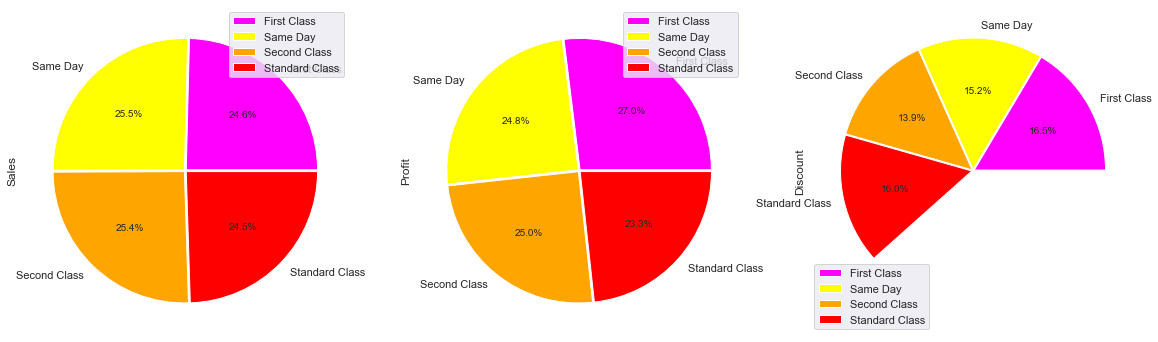

In [11]:
data_shipmode.plot.pie(subplots=True, figsize=(20,10), labels=data_shipmode.index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01), colors=colors_4)
plt.show()

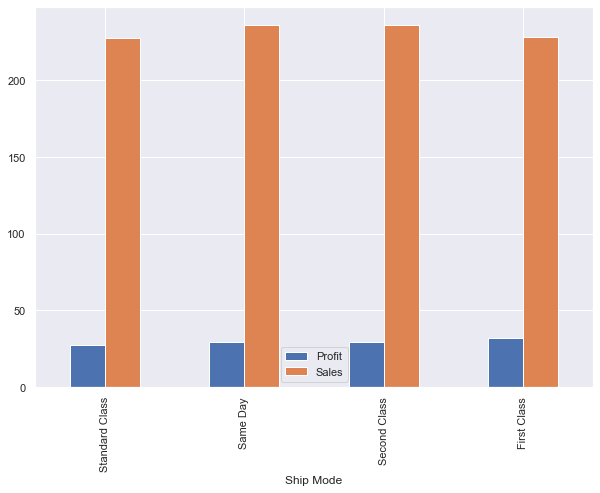

In [12]:
data_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(10,7))

In [13]:
data_shipmode.sum(axis=0)

Sales       928.565508
Profit      118.136854
Discount      0.615922
dtype: float64

In [14]:
data_shipmode['Sales%'] = data_shipmode['Sales']/9.285
data_shipmode['Profit%'] = data_shipmode['Profit']/1.181

In [15]:
data_shipmode.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
Ship Mode,,,,,
Standard Class,227.583067,27.494770,0.160023,24.510831,23.280923
Same Day,236.396179,29.266591,0.152394,25.460008,24.781195
Second Class,236.089239,29.535545,0.138895,25.426951,25.008929
First Class,228.497024,31.839948,0.164610,24.609265,26.960159


## Sales
### Lowest sales: Standard Class(24.51%)
### Highest sales: Same Day(25.46%)

## Profit
### Lowest profit: Standard Class(23.28%)
### Highest profit: First class(26.96%)

#### Though there is very little differences between the classes, still, maximum and minimum can be ascertained on seeing these analysis.

## [2] Analysis based on segment

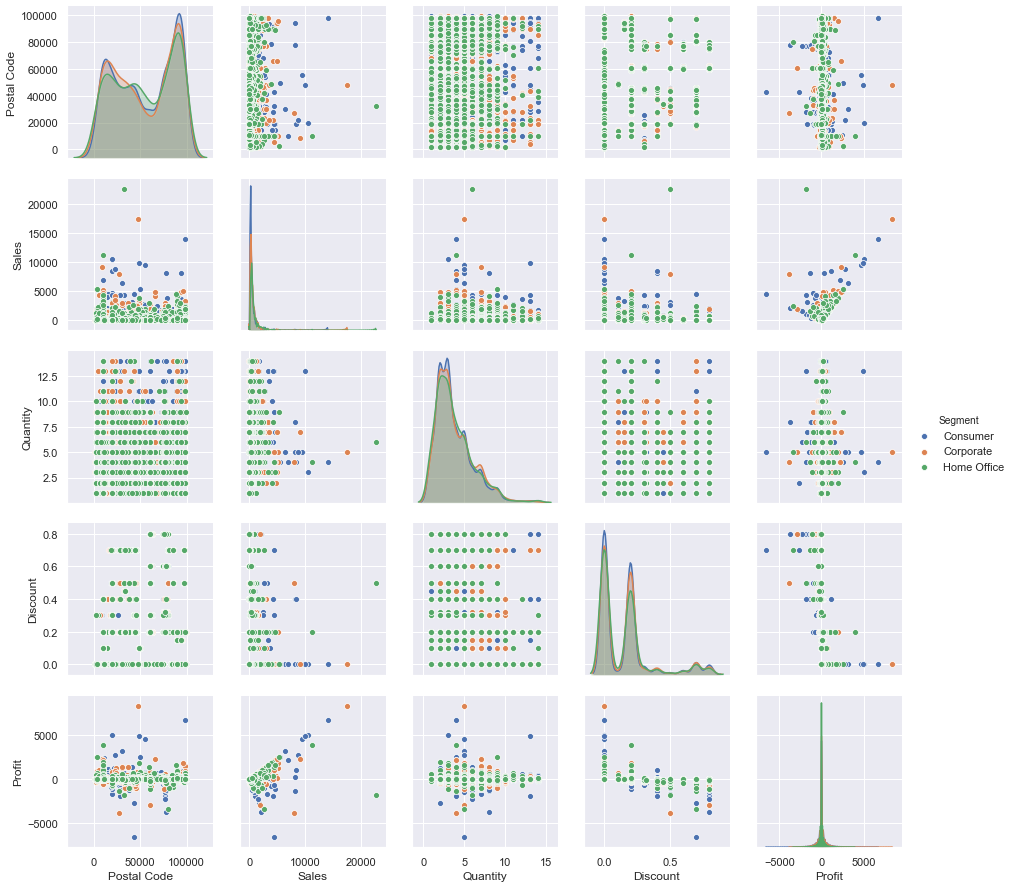

In [16]:
sns.pairplot(data, hue='Segment')

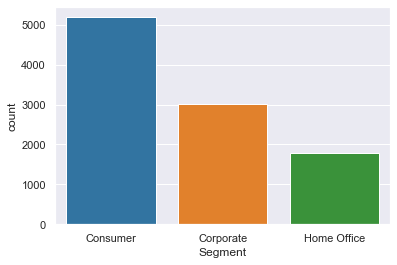

In [17]:
sns.countplot(x='Segment', data=data, palette='tab10')

In [18]:
data_segment = data.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2883DB8C8>,
      dtype=object)

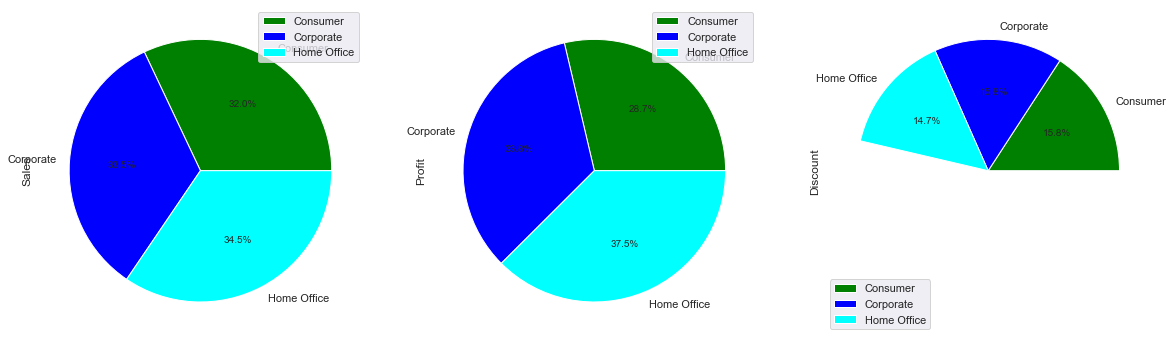

In [19]:
data_segment.plot.pie(subplots=True, figsize=(20,10), labels=data_segment.index, autopct='%1.1f%%', colors=colors_3)

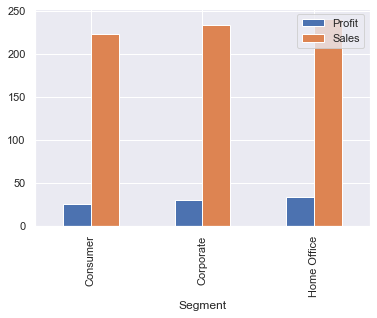

In [20]:
data_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar')

In [21]:
data_segment.sum(axis=0)

Sales       698.528985
Profit       90.112204
Discount      0.463498
dtype: float64

In [22]:
data_segment['Sales%'] = data_segment['Sales']/6.985
data_segment['Profit%'] = data_segment['Profit']/0.9011

In [23]:
data_segment.sort_values('Profit')

,Sales,Profit,Discount,Sales%,Profit%
Segment,,,,,
Consumer,223.733644,25.836873,0.158141,32.030586,28.672593
Corporate,233.823300,30.456667,0.158228,33.475061,33.799431
Home Office,240.972041,33.818664,0.147128,34.498503,37.530423


## Sales
### Lowest sales: Consumer(32.03%)
### Highest sales: Home Office(34.50%)

## Profit
### Lowest profit: Consumer(28.67%)
### Highest profit: Home Office(37.53%)


#### Though there is very little differences between the classes, still, maximum and minimum can be ascertained on seeing these analysis. The corporates are on the second position for both sales an profits with Home office leading the drive in the best way for the company

## [3] Analysis based on State

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

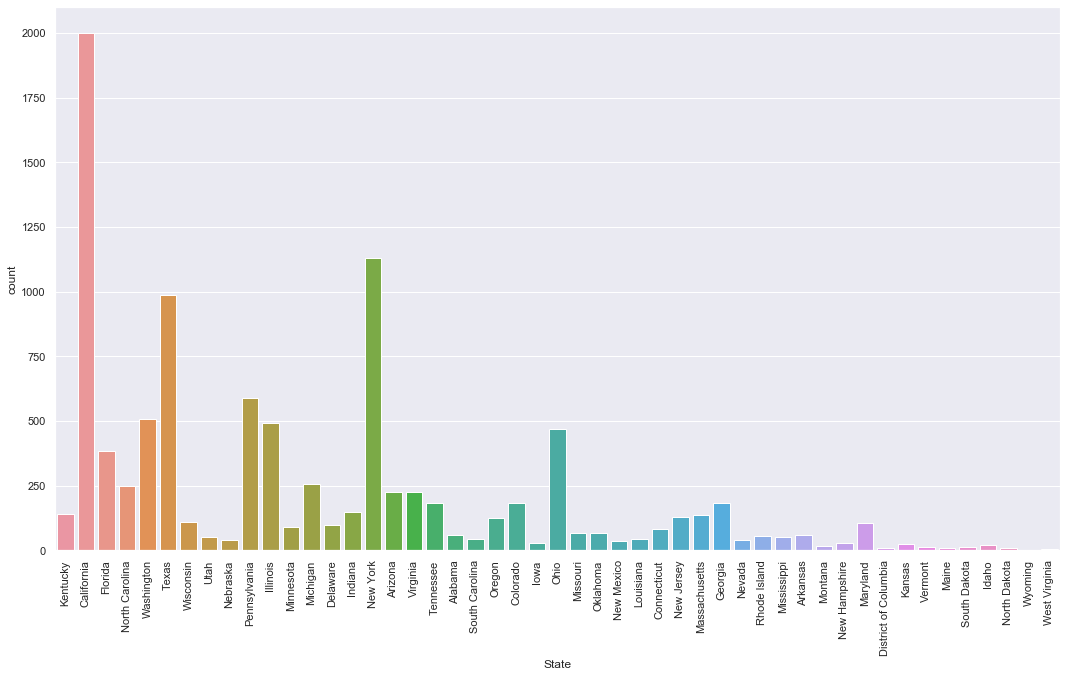

In [24]:
plt.figure(figsize=(18,10))
sns.countplot(data['State'])
plt.xticks(rotation=90)

In [25]:
data_state = data.groupby(['State'])[['Sales','Profit','Discount']].mean()

In [26]:
data_state1 = data_state.sort_values('Profit')

In [27]:
data_state2 = data_state.sort_values('Sales')

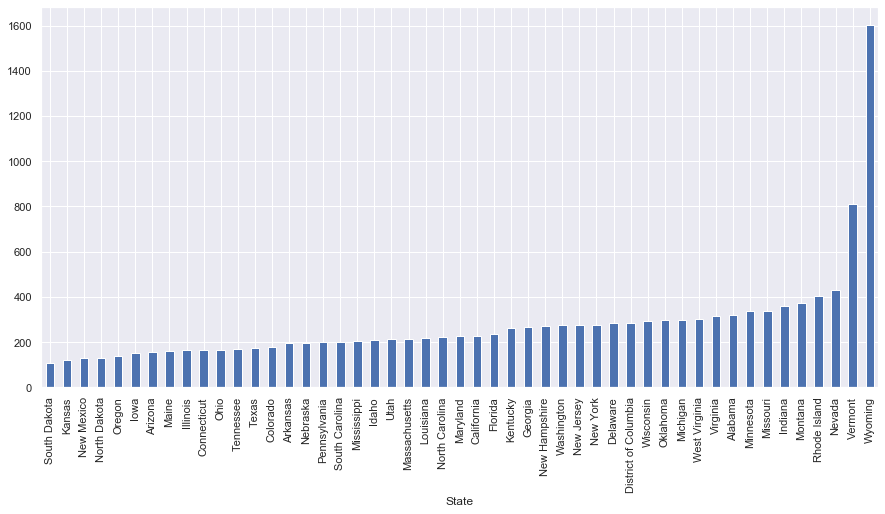

In [28]:
data_state2['Sales'].plot(kind='bar', figsize=(15,7))

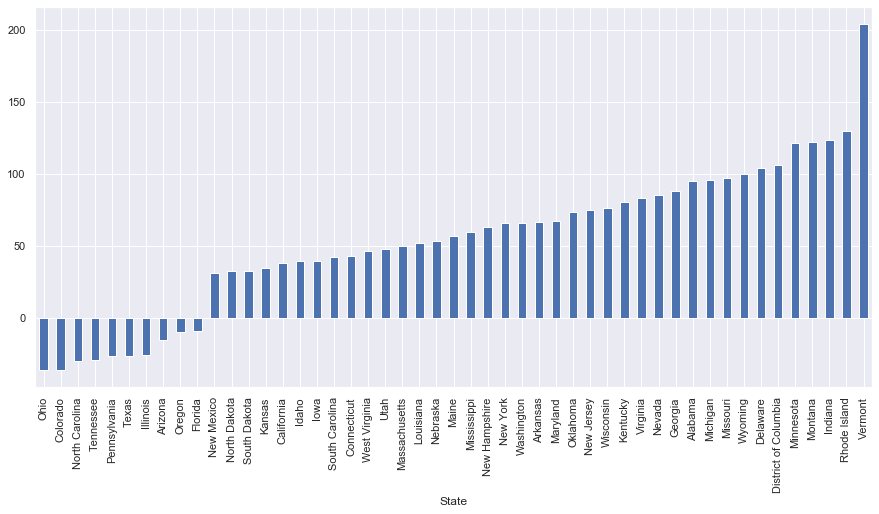

In [29]:
data_state1['Profit'].plot(kind='bar', figsize=(15,7))

### Rather than creating a new DF and spending more memory, I came up with another simple solution

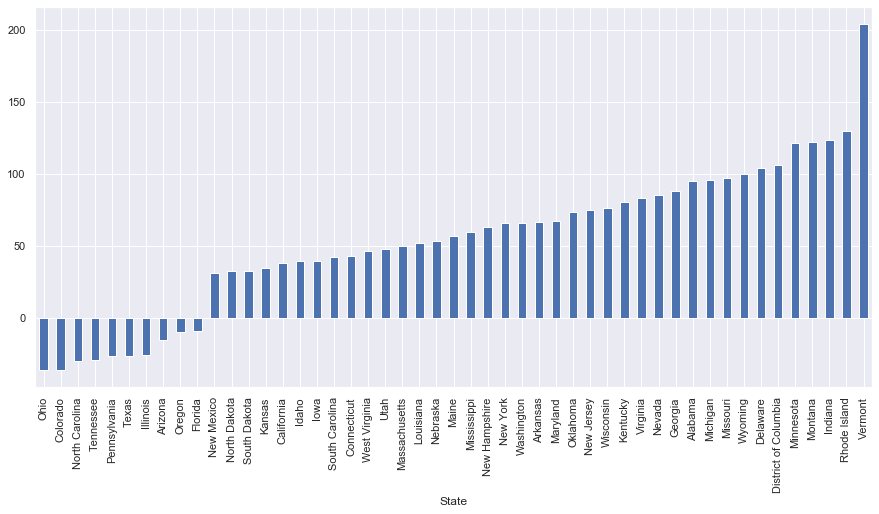

In [30]:
data_state.sort_values('Profit')['Profit'].plot(kind='bar', figsize=(15,7))

# Same way can be done for Sales as well.

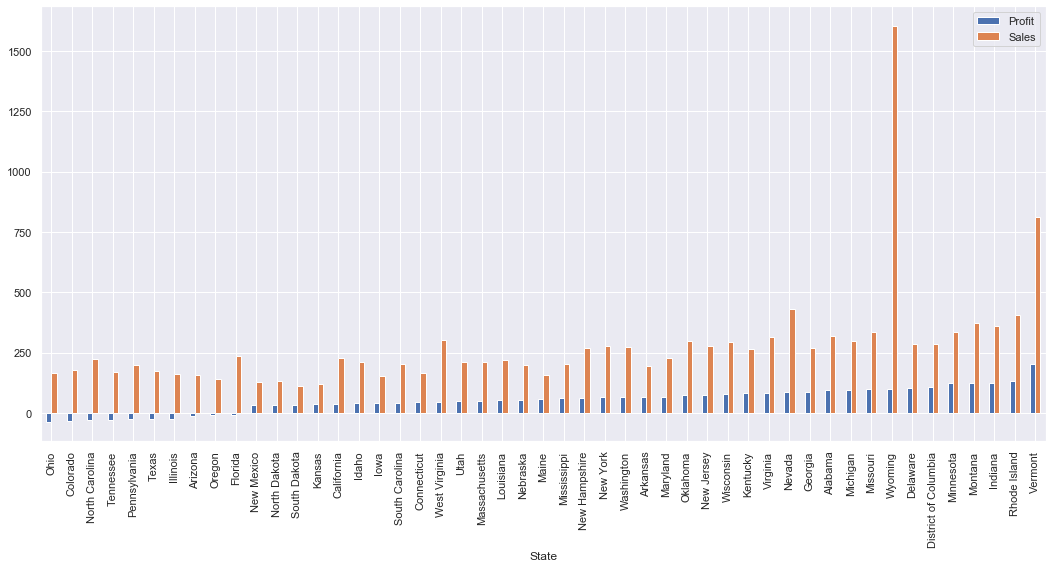

In [52]:
# Sorted by Profits
data_state.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

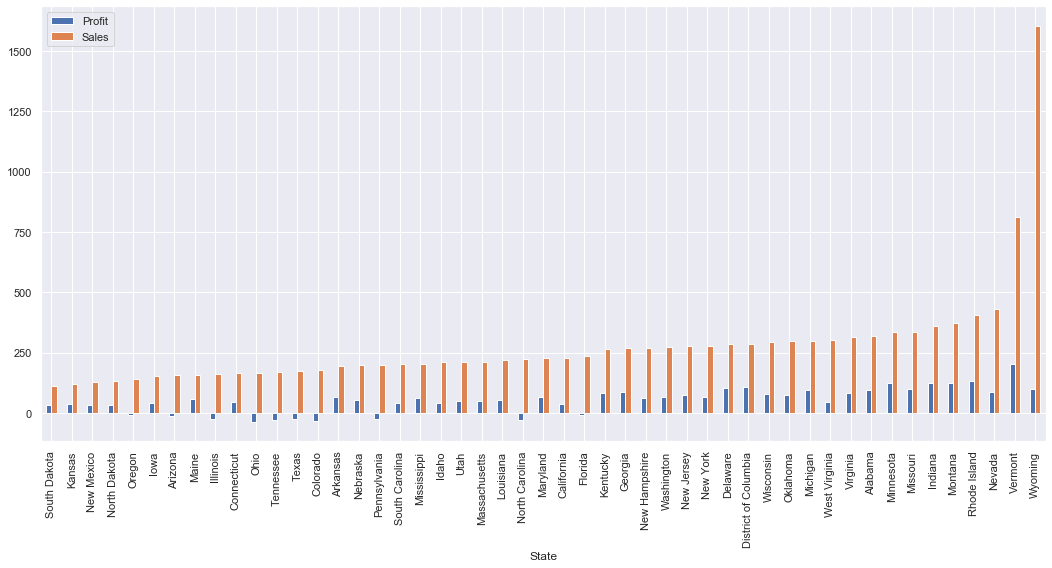

In [53]:
# Sorted by Sales
data_state.sort_values('Sales')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

In [33]:
data_state.sum(axis=0)

Sales       13545.408037
Profit       2648.344280
Discount        4.076625
dtype: float64

In [34]:
data_state['Sales%'] = data_state['Sales']/135.454
data_state['Profit%'] = data_state['Profit']/26.483

In [35]:
data_state.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
State,,,,,
Ohio,166.861697,-36.186304,0.324947,1.231870,-1.366397
Colorado,176.418231,-35.867351,0.316484,1.302422,-1.354354
North Carolina,223.305880,-30.083985,0.283534,1.648574,-1.135973
Tennessee,167.551219,-29.189583,0.291257,1.236960,-1.102201
Pennsylvania,198.487077,-26.507598,0.328620,1.465347,-1.000929
Texas,172.779742,-26.121174,0.370193,1.275560,-0.986337
Illinois,162.939230,-25.625787,0.390041,1.202912,-0.967632
Arizona,157.508933,-15.303235,0.303571,1.162822,-0.577851
Oregon,140.573790,-9.600569,0.288710,1.037797,-0.362518


## Sales
### Lowest sale: South Dakota(0.81%)
### Highest sale: Wyoming(11.84%)

#### The company should focus on improving their sales in South dakota, kansas, new mexico, north dakota, oregon and few more states whose share in sales is miniscule

## Profit
### Lowest profit: Ohio(-1.4%)
### Highest profit: Vermont(7.7%)

#### The company must ascertain reasons why 10 states are leading to a loss with Ohio leading the charts. Either the faults must be corrected or considering the present situation, if the company isn't able to come to the break-even point, the operations must be discontinued.

## [4] Analysis based on Region

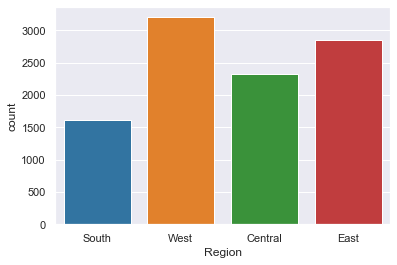

In [36]:
sns.countplot(data['Region'], palette='tab10')

In [37]:
data_region2 = data.groupby(['Region'])[['Sales','Profit']].mean()

In [38]:
data_region2

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.493233,33.849032


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F28AE56BC8>,
      dtype=object)

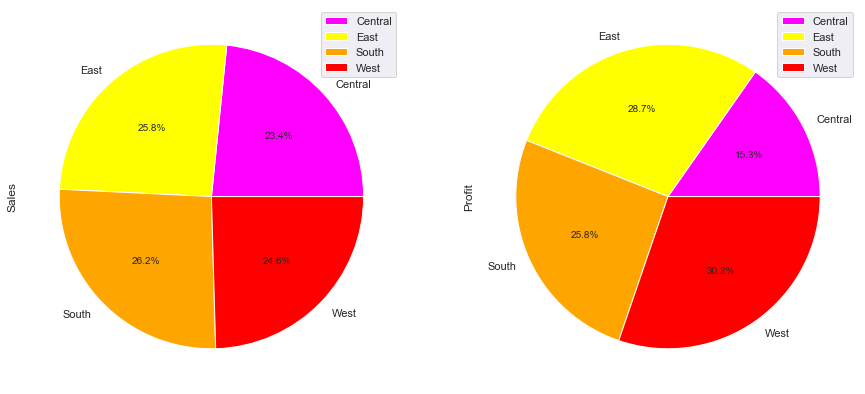

In [39]:
data_region2.plot.pie(subplots=True, figsize=(15,7), autopct='%1.1f%%', label=data_region2.index.values, colors=colors_4)

In [40]:
data_region2.sum(axis=0)

Sales     922.405648
Profit    111.935221
dtype: float64

In [41]:
data_region2['Sales%'] = data_region2['Sales']/9.224
data_region2['Profit%'] = data_region2['Profit']/1.119

In [42]:
data_region2.sort_values('Profit')

,Sales,Profit,Sales%,Profit%
Region,,,,
Central,215.772661,17.092709,23.392526,15.274986
South,241.803645,28.857673,26.214619,25.788805
East,238.336110,32.135808,25.838694,28.718327
West,226.493233,33.849032,24.554774,30.249358


## Sales
### Lowest sales: Central(23.40%)
### Highest sales: South(26.21%)
#### The sales seem fine in all the regions since the variation range is less, however steps can still be taken to improve the sales in Central zone.


## Profit
### Lowest profit: Central(15.27%)
### Highest profit: West(30.25%)
#### The profits have to be looked at since the West zone is giving almost double the profit as compared to the central one, so the company will have to take steps to analyze the shortcoming in terms of both sales and profits for the central region

## [5] Analysis of Sub Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

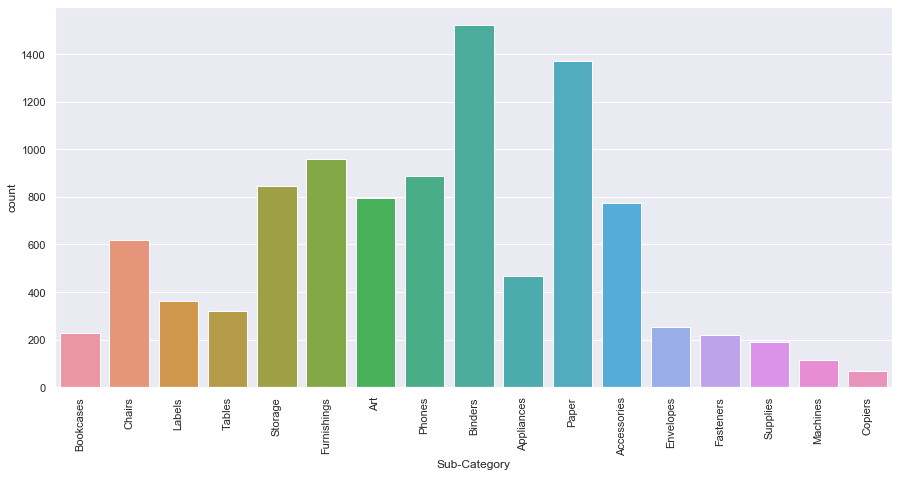

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=90)

In [44]:
data_subcat = data.groupby(['Sub-Category'])[['Sales','Profit']].mean()

## Sales for sub categories

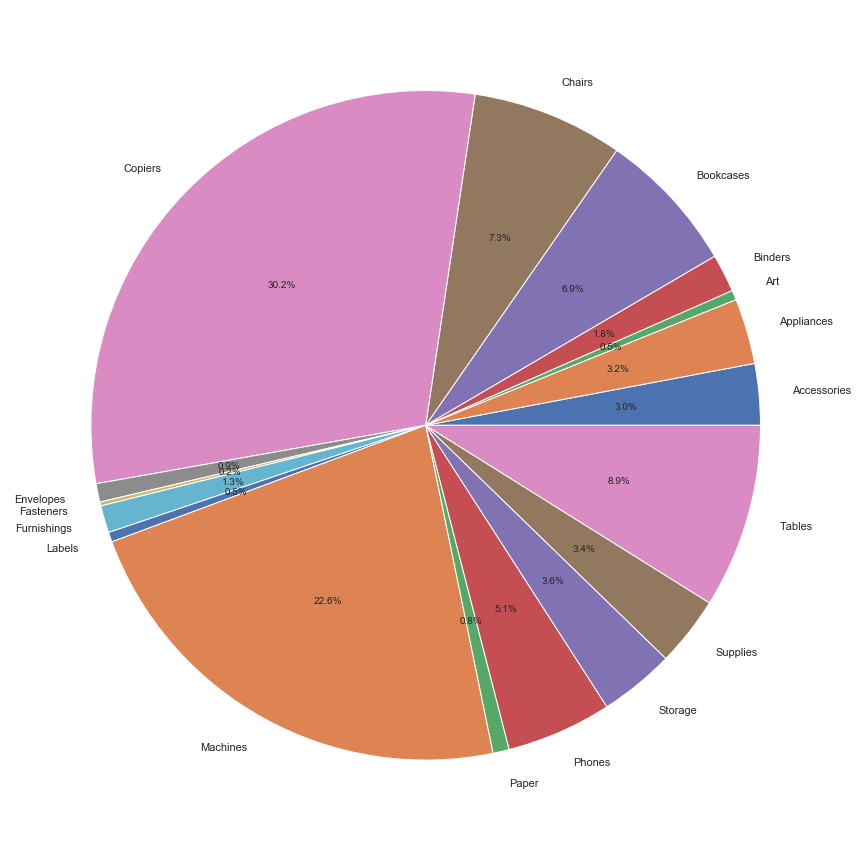

In [45]:
plt.figure(figsize=(15,18))
plt.pie(data_subcat['Sales'], labels = data_subcat.index, autopct='%1.1f%%')
plt.show()

## Profits for sub categories

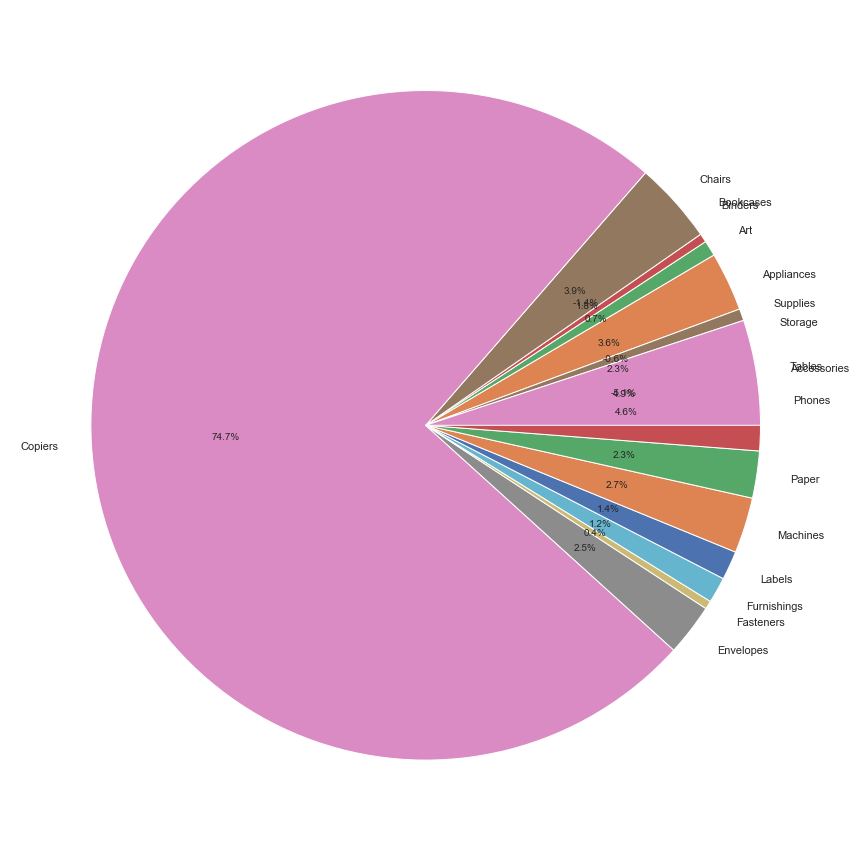

In [46]:
plt.figure(figsize=(15,18))
plt.pie(data_subcat['Profit'], labels=data_subcat.index, autopct='%1.1f%%')
plt.show()

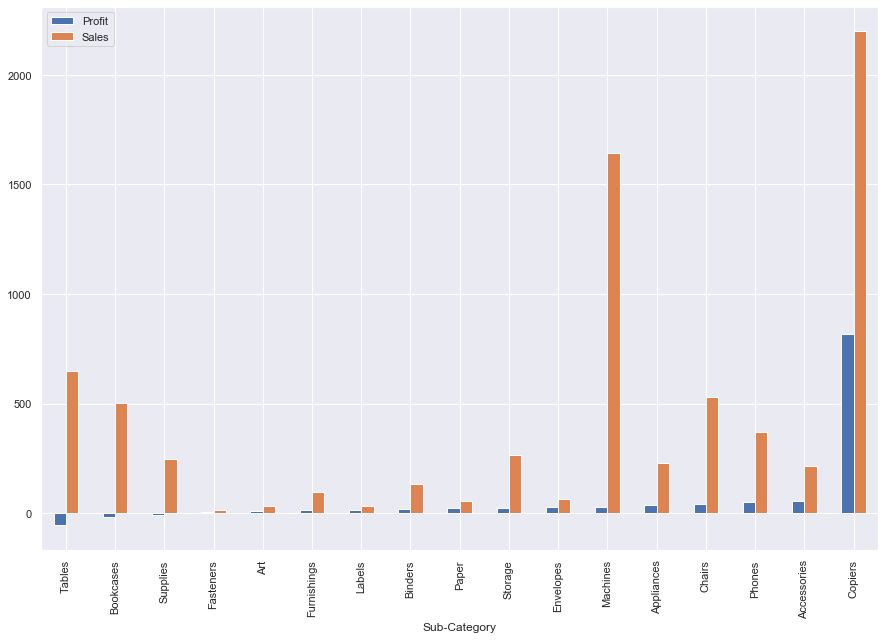

In [47]:
data_subcat.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

In [48]:
data_subcat.sum(axis=0)

Sales     7291.511064
Profit    1095.221304
dtype: float64

In [49]:
data_subcat['Sales%'] = data_subcat['Sales']/72.915
data_subcat['Profit%'] = data_subcat['Profit']/10.952

In [50]:
data_subcat.sort_values('Sales')

,Sales,Profit,Sales%,Profit%
Sub-Category,,,,
Fasteners,13.936774,4.375660,0.191137,0.399531
Art,34.068834,8.200737,0.467240,0.748789
Labels,34.303055,15.236962,0.470453,1.391249
Paper,57.284092,24.856620,0.785628,2.269596
Envelopes,64.867724,27.418019,0.889635,2.503471
Furnishings,95.825668,13.645918,1.314211,1.245975
Binders,133.560560,19.843574,1.831730,1.811868
Accessories,215.974604,54.111788,2.962005,4.940813
Appliances,230.755710,38.922758,3.164722,3.553941


## Sales
### Lowest sales: Fasteners(0.2%)
### Highest sales: Copiers(30.2%)

## Profit
### Lowest profit: Tables(-55.6%)
### Highest profit: Copiers(74.7%)

#### Looking at the statistical figures, the company must have the main function in copiers since the sales and profits are heavily influenced by copiers.
#### The company must discontinue the sales of tables since it is contributing to a heavy loss and steps could be taken to improve profits for other sub categories

## Thank You!
